In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({
    'date': pd.date_range(start='2024-01-01', freq='D', periods=31),
    'store1': np.random.randint(50, 100, size=31),
    'store2': np.random.randint(100, 150, size=31),
    'store3': np.random.randint(50, 100, size=31)
})

In [3]:
df.dtypes

date      datetime64[ns]
store1             int32
store2             int32
store3             int32
dtype: object

In [4]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [5]:
df.dtypes

date      object
store1     int32
store2     int32
store3     int32
dtype: object

In [6]:
df.head(3)

,date,store1,store2,store3
0,2024-01-01,60,132,54
1,2024-01-02,99,126,69
2,2024-01-03,83,116,99


In [7]:
df.tail(3)

,date,store1,store2,store3
28,2024-01-29,53,129,78
29,2024-01-30,61,117,72
30,2024-01-31,78,119,86


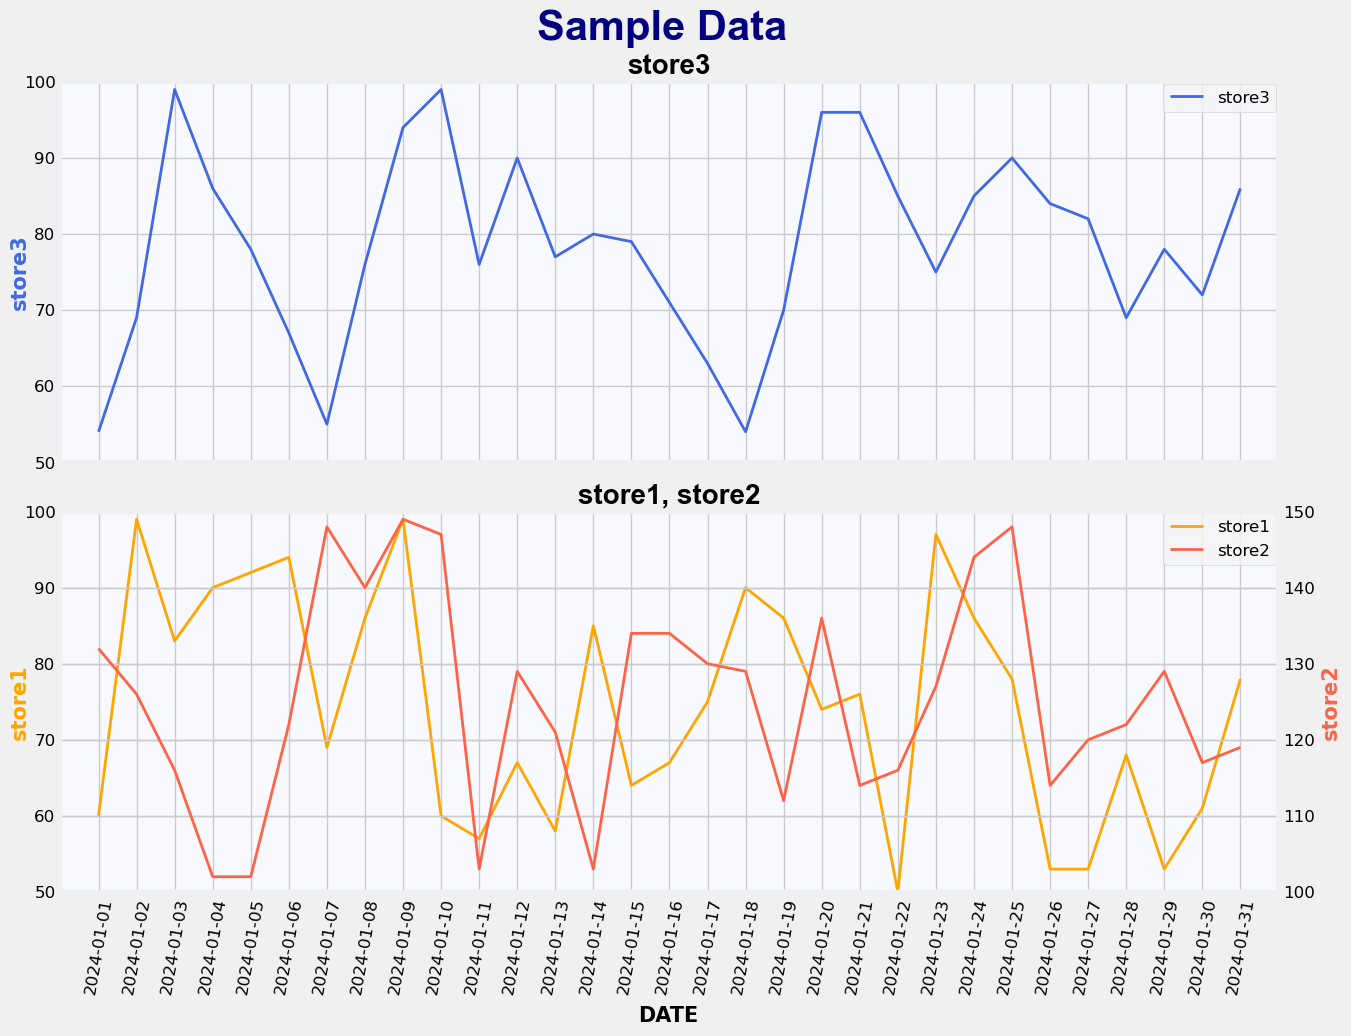

In [8]:
from matplotlib.lines import Line2D
import matplotlib as mpl
#sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
sns.set_palette('tab20')
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axes1_2 = axes[1].twinx()
sns.lineplot(ax=axes[0], data=df, x='date', y='store3', 
             color='royalblue', ci=None, estimator=np.sum, lw=2)
sns.lineplot(ax=axes[1], data=df, x='date', y='store1', 
             color='orange', ci=None, estimator=np.sum, lw=2)
sns.lineplot(ax=axes1_2, data=df, x='date', y='store2', 
             color='tomato', ci=None, estimator=np.sum, lw=2)
custom_line = [Line2D([0], [0], color='royalblue', lw=2)]

custom_lines = [Line2D([0], [0], color='orange', lw=2),
                Line2D([0], [0], color='tomato', lw=2)]

legend0 = axes[0].legend(custom_line, ['store3'], bbox_to_anchor=(1.005, 1.0175), loc=1, fontsize='12') #borderaxespad=0., 
legend1 = axes[1].legend(custom_lines, ['store1', 'store2'], bbox_to_anchor=(1.005, 1.0175), loc=1, fontsize='12') #borderaxespad=0.,

frame0 = legend0.get_frame()
frame0.set_facecolor('whitesmoke')

frame1 = legend1.get_frame()
frame1.set_facecolor('whitesmoke')

for i in range(2):
    axes[i].set_facecolor('ghostwhite')
    axes[i].tick_params('x', colors='k', labelrotation=80, labelsize=12)
    axes[i].tick_params('y', colors='k', labelsize=12)
    axes[i].yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True));

axes[0].set_ylabel('store3', color='royalblue', fontsize = 15, fontweight='bold')               
axes[1].set_xlabel('DATE', color='k', fontsize = 15, fontweight='bold')
axes[1].xaxis.set_label_coords(0.499, -0.30)
axes[1].set_ylabel('store1', color='orange', fontsize = 15, fontweight='bold')
axes1_2.set_ylabel('store2', color='tomato', fontsize = 15, fontweight='bold')
axes1_2.tick_params('y', colors='k', labelsize=12)
axes[0].yaxis.set_label_coords(-0.025, 0.5)
axes[1].yaxis.set_label_coords(-0.025, 0.5)
axes1_2.yaxis.set_label_coords(1.035, 0.5)
fig.text(0.51, 0.933, 'Sample Data', ha='center', va='center', fontsize=30, fontname='Arial', fontweight='bold', color='navy')
axes[0].set_title('store3', fontsize = 20, fontname='Arial', fontweight='bold')
axes[1].set_title('store1, store2', fontsize = 20, fontname='Arial', fontweight='bold')
axes[1].set_xlim([-1, 31])
axes[1].set_xticks(np.arange(0, 31, step=1))
axes[0].set_ylim([50, 100])
axes[1].set_ylim([50, 100])
axes1_2.set_ylim([100, 150])
axes[0].set_yticks(np.arange(50, 101, step=10))
axes[1].set_yticks(np.arange(50, 101, step=10))
axes1_2.set_yticks(np.arange(100, 151, step=10))
plt.subplots_adjust(hspace=0.13, wspace=0.2)
plt.show()